<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import plotly.express as px
import yaml
from urllib.parse import quote_plus

In [2]:
with open('config.yaml') as f:
    conn_param = yaml.safe_load(f)

In [3]:
url = 'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'. \
format(username = conn_param["USER"],
       password = conn_param["PASSWORD"],
       host = conn_param["HOST"],
       port = conn_param["PORT"],
       database = conn_param["DBNAME"])
engine = sqlalchemy.create_engine(url)
connection = engine.connect()

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query = f'''SELECT COUNT(id) AS vacancies_cnt
            FROM public.vacancies
         '''

df = pd.read_sql_query(query, connection)

In [5]:
# результат запроса
print('Количество вакансий в базе:', df['vacancies_cnt'][0])

Количество вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query = f'''SELECT COUNT(id) AS employers_cnt
            FROM public.employers
         '''

df = pd.read_sql_query(query, connection)

In [7]:
# результат запроса
print('Количество работодателей в базе:', df['employers_cnt'][0])

Количество работодателей в базе: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query = f'''SELECT COUNT(id) AS regions_cnt
            FROM public.areas
         '''

df = pd.read_sql_query(query, connection)

In [9]:
# результат запроса
print('Количество регионов в базе:', df['regions_cnt'][0])

Количество регионов в базе: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query = f'''SELECT COUNT(id) AS industries_cnt
            FROM public.industries
         '''

df = pd.read_sql_query(query, connection)

In [11]:
# результат запроса
print('Количество сфер деятельности в базе:', df['industries_cnt'][0])

Количество сфер деятельности в базе: 294


***

*База содержит достаточно большой объем информации для анализа, почти 50 тысяч вакансий из более чем 1000 регионов, представлено около 300 различных сфер деятельности. В среднем размещено примерно по 2 вакансии от каждого работодателя.*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query = f'''SELECT areas.name as area,
              COUNT(vacancies.id) as cnt
            FROM public.areas areas
            LEFT JOIN public.vacancies vacancies
            ON areas.id = vacancies.area_id
            GROUP BY areas.name
            ORDER BY 2 DESC
         '''

df = pd.read_sql_query(query, connection)

In [13]:
# результат запроса
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
1357,Багаевская,0
1358,Пролетарск,0
1359,Седельниково,0
1360,Инской,0


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query = f'''SELECT COUNT(id) AS vacancies_cnt
            FROM public.vacancies
            WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
         '''

df = pd.read_sql_query(query, connection)

In [15]:
# результат запроса
print('Количество вакансий с данными о зарплате:', df['vacancies_cnt'][0])

Количество вакансий с данными о зарплате: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query = f'''SELECT ROUND(AVG(salary_from), 0) AS avg_salary_from,
              ROUND(AVG(salary_to), 0) AS avg_salary_to
            FROM public.vacancies
         '''

df = pd.read_sql_query(query, connection)

In [17]:
# результат запроса
print('Среднее для нижней границы вилки зп:', df['avg_salary_from'][0])
print('Среднее для верхней границы вилки зп:', df['avg_salary_to'][0])

Среднее для нижней границы вилки зп: 71065.0
Среднее для верхней границы вилки зп: 110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query = f'''SELECT schedule, employment,
              COUNT(id) AS vacancies_cnt
            FROM public.vacancies
            GROUP BY 1, 2
            ORDER BY 3 DESC
         '''

df = pd.read_sql_query(query, connection)

In [19]:
# результат запроса
df

,schedule,employment,vacancies_cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query = f'''SELECT experience,
              COUNT(id) AS vacancies_cnt
            FROM public.vacancies
            WHERE experience IS NOT NULL
            GROUP BY 1
            ORDER BY 2 ASC
         '''

df = pd.read_sql_query(query, connection)

In [21]:
# результат запроса
df

,experience,vacancies_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


Построим гистограмму и коробчатую диаграмму распределения числа вакансий в зависимости от средней зарплаты

In [22]:
query = f'''SELECT id,
              (COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2 AS avg_salary
            FROM public.vacancies
            WHERE COALESCE(salary_from, salary_to) IS NOT NULL
         '''

df = pd.read_sql_query(query, connection)

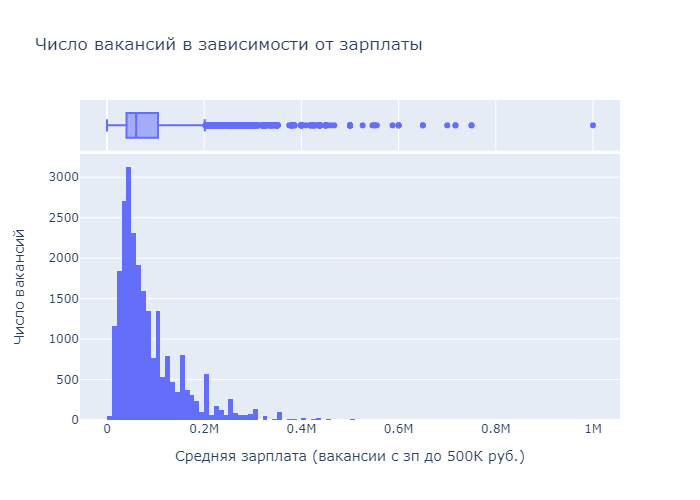

In [23]:
fig = px.histogram(
    df,
    x = "avg_salary",
    marginal = "box",
    nbins = 100,
    title = 'Число вакансий в зависимости от зарплаты'
)
fig.update_layout(xaxis_title_text = 'Средняя зарплата (вакансии с зп до 500К руб.)', yaxis_title_text = 'Число вакансий')
fig.show("png")
fig.write_html("plotly/vacancies_salary.html")

Мода равна 60 тысяч рублей, минимальное и максимальное значения около 30 и 200 тысяч рублей соответственно. Аномально выглядят потенциальные выбросы справа.
В дальнейших исследованиях зависимостей, связанных с заработной платой, исключим вакансии со средней зарплатой более 200 тысяч рублей

In [24]:
query = f'''SELECT experience,
              AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from))/2) AS avg_salary
            FROM public.vacancies
            WHERE COALESCE(salary_from, salary_to) is not null and COALESCE(salary_from, salary_to) < 200000
            GROUP BY experience
            ORDER BY 2
         '''

df = pd.read_sql_query(query, connection)

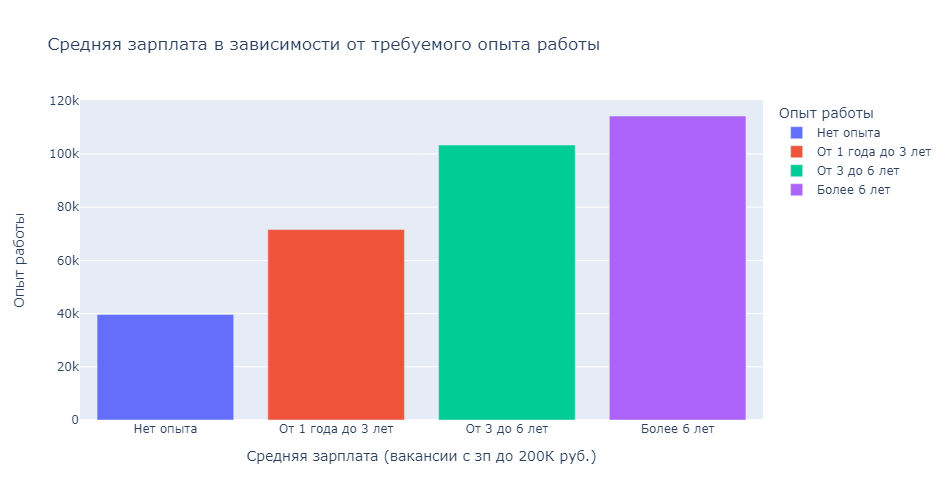

In [25]:
fig = px.bar(
    data_frame = df,
    x = "experience",
    y = "avg_salary",
    color = 'experience',
    orientation = 'v',
    height = 500,
    width = 950,
    title = 'Средняя зарплата в зависимости от требуемого опыта работы'
)
fig.update_layout(
    xaxis_title_text = 'Средняя зарплата (вакансии с зп до 200К руб.)',
    yaxis_title_text = 'Опыт работы',
    legend = dict(title = "Опыт работы")
)
fig.show("png")
fig.write_html("plotly/salary_experience.html")

Наибольший уровень предлагаемой зарплаты для соискателей с опытом работы от 6 лет, наименьший - для соискателей без опыта.

Опыт имеет смысл учитывать при прогнозировании заработной платы, т.к. видна явная зависимость.

***

*Наибольшее число вакансий - в крупных городах. Медианная зарплата около 60 тысяч рублей, при этом видна прямая зависимость заработной платы от опыта работы*

*Однако вакансии с указанной зарплатой составляют всего около половины ото всей базы вакансий. Таким образом, для полноценного исследования их нельзя исключать из рассмотрения. В следующем блоке исследуем этот вопрос более детально*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [26]:
# текст запроса
query = f'''(SELECT '1st place' AS employer_rating,
               employers.name,
               COUNT(vacancies.id) AS vacancies_cnt
             FROM public.employers employers
             LEFT JOIN
                  public.vacancies vacancies
             ON employers.id = vacancies.employer_id
             GROUP BY 1, 2
             ORDER BY 3 DESC
             LIMIT 1)
             UNION ALL
            (SELECT '5th place' AS employer_rating,
               employers.name,
               COUNT(vacancies.id) AS vacancies_cnt
             FROM public.employers employers
             LEFT JOIN
                  public.vacancies vacancies
             ON employers.id = vacancies.employer_id
             GROUP BY 1, 2
             ORDER BY 3 DESC
             OFFSET 4
             LIMIT 1)
         '''

df = pd.read_sql_query(query, connection)

In [27]:
# результат запроса
df

,employer_rating,name,vacancies_cnt
0,1st place,Яндекс,1933
1,5th place,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [28]:
# текст запроса
df = pd.read_sql_query(query, connection)
df
query = f'''SELECT areas.name AS region_name,
              emp.employers_cnt,
              vacancies.vacancies_cnt
            FROM public.areas areas
            LEFT JOIN
           (SELECT area_id,
              COUNT(id) AS vacancies_cnt
            FROM public.vacancies
            GROUP BY 1
           ) vacancies
            ON areas.id = vacancies.area_id
            LEFT JOIN
           (SELECT area AS area_id,
              COUNT(id) AS employers_cnt
            FROM public.employers employers
            GROUP BY 1
           ) AS emp
            ON areas.id = emp.area_id
            ORDER BY 2 DESC NULLS LAST
         '''


df = pd.read_sql_query(query, connection)

In [29]:
# результат запроса
df

,region_name,employers_cnt,vacancies_cnt
0,Москва,5864.0,5333.0
1,Санкт-Петербург,2217.0,2851.0
2,Минск,1115.0,2112.0
3,Алматы,721.0,1892.0
4,Екатеринбург,609.0,1698.0
...,...,...,...
1357,Североморск,NaN,3.0
1358,Толмачево,NaN,NaN
1359,Костомукша,NaN,4.0
1360,Иваново (Брестская область),NaN,NaN


In [30]:
# текст запроса
query1 = f'''SELECT areas.name AS region_name,
               emp.employers_cnt,
               vacancies.vacancies_cnt
             FROM public.areas areas
             LEFT JOIN
            (SELECT area_id,
               COUNT(id) AS vacancies_cnt
             FROM public.vacancies GROUP BY 1
            ) vacancies
             ON areas.id = vacancies.area_id
             LEFT JOIN
            (SELECT area AS area_id,
               COUNT(id)  AS employers_cnt
             FROM public.employers employers
             GROUP BY 1
            ) AS emp
             ON areas.id = emp.area_id
             WHERE vacancies.area_id IS NULL
             ORDER BY 2 DESC NULLS LAST
             LIMIT 1
          '''

In [31]:
df1 = pd.read_sql_query(query1, connection)
print('Регион без вакансий с наибольшим числом работодателей:', df1['region_name'][0])

Регион без вакансий с наибольшим числом работодателей: Россия


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [32]:
# текст запроса
query = f'''SELECT employer_id,
              COUNT(DISTINCT area_id) AS areas_unique_cnt
            FROM public.vacancies vacancies
            GROUP BY 1
            ORDER BY 2 DESC
         '''

df = pd.read_sql_query(query, connection)

In [33]:
# результат запроса
df

,employer_id,areas_unique_cnt
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88
4,3682876,71
...,...,...
14901,810278,1
14902,810313,1
14903,810551,1
14904,810688,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
# текст запроса
query = f'''SELECT COUNT(DISTINCT emp.id) AS employers_unique_cnt
            FROM public.employers emp
            LEFT JOIN public.employers_industries emp_ind
            ON emp.id = emp_ind.employer_id
            WHERE emp_ind.employer_id IS NULL
         '''

df = pd.read_sql_query(query, connection)

In [35]:
# результат запроса
print('Количество работодателей, у которых не указана сфера деятельности:', df['employers_unique_cnt'][0])

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [36]:
# текст запроса
query = f'''SELECT emp.name,
              COUNT(emp_ind.industry_id) AS industries_cnt
            FROM public.employers_industries emp_ind
            LEFT JOIN public.employers emp
            ON emp_ind.employer_id = emp.id
            GROUP BY 1
            HAVING COUNT(emp_ind.industry_id) = 4
            ORDER BY 1 ASC OFFSET 2 LIMIT 1
         '''

df = pd.read_sql_query(query, connection)

In [37]:
# результат запроса
print('3-е место среди компаний с 4-мя сферами деятельности:', df['name'][0])

3-е место среди компаний с 4-мя сферами деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [38]:
# текст запроса
query = f'''SELECT COUNT(DISTINCT employer_id) AS employers_unique_cnt
            FROM public.employers_industries emp_ind
            LEFT JOIN
                 public.industries industries
            ON emp_ind.industry_id = industries.id
            WHERE industries.name = 'Разработка программного обеспечения'
         '''

df = pd.read_sql_query(query, connection)

In [39]:
# результат запроса
print('Кол-во работодателей в сфере разработки ПО:', df['employers_unique_cnt'][0])

Кол-во работодателей в сфере разработки ПО: 3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [40]:
url = quote_plus('https://ru.wikipedia.org/wiki/Города-миллионеры_России', safe=':/')
mln_cities = tuple(pd.read_html(url)[1]['Город'])
mln_cities_population = pd.read_html(url)[1]

mln_cities_population['Население, тыс. чел. (на 1 января 2023 года)'] \
= mln_cities_population['Население, тыс. чел. (на 1 января 2023 года)'] \
.apply(lambda x: x.replace(' ' ,'')).astype(int)

In [41]:
query = f'''(SELECT areas.name,
               COUNT(DISTINCT vacancies.id) AS cnt
             FROM
                  public.vacancies vacancies
             LEFT JOIN 
                  public.employers employers
             ON vacancies.employer_id = employers.id
             LEFT JOIN
                  public.areas areas
             ON vacancies.area_id = areas.id
             WHERE employers.name = 'Яндекс'
             AND areas.name IN {mln_cities}
             GROUP BY 1)
             UNION ALL
            (SELECT 'Total' AS name,
               COUNT(DISTINCT vacancies.id) AS cnt
             FROM 
                   public.vacancies vacancies
             LEFT JOIN
                   public.employers employers
             ON vacancies.employer_id = employers.id
             LEFT JOIN
                   public.areas areas
             ON vacancies.area_id = areas.id
             WHERE employers.name = 'Яндекс'
             AND areas.name IN {mln_cities}
             GROUP BY 1)
             ORDER BY 2 ASC
         '''.format(mln_cities)

yandex_areas_df = pd.read_sql_query(query, connection)

In [42]:
# результат запроса
yandex_areas_df

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


Проанализируем закономерности, которые влияют на то, указана ли предлагаемая заработная плата. Для этого рассмотрим долю вакансий с зарплатой и без нее, в разрезе регионов, в которых предлагается вакансия.

In [43]:
query = f'''
/* Вынесем отдельно подзапрос, который формирует справочную таблицу по городам. К имеющейся таблице areas
   добавлено поле city_type, в котором города сгруппированы на кластеры по населению*/
WITH areas AS 
  (SELECT areas.id,
    areas.name,
    CASE
      WHEN name IN ('Москва', 'Санкт-Петербург')
      THEN name
      WHEN (name in {mln_cities}
      AND name NOT IN ('Москва', 'Санкт-Петербург'))
      THEN 'Город-миллионник'
      ELSE 'Другие'
    END AS city_type
  FROM public.areas
  )
---- Main
SELECT areas.city_type,
  SUM(
  CASE
    WHEN COALESCE(salary_from, salary_to) IS NULL
    THEN 1
    ELSE 0
  END)                         AS vac_wo_salary,
  COUNT(DISTINCT vacancies.ID) AS vac_ttl,
  /*В поле vac_wo_salary рассчитан флаг, который принимает значение 1,
    если в описании вакансии не указана зарплата. При подсчете числа таких вакансий данный флаг
    можно просто прсуммировать, это сделано в формуле ниже*/
  SUM(
  CASE
    WHEN COALESCE(salary_from, salary_to) IS NULL
    THEN 1
    ELSE 0
  END)*100/COUNT(DISTINCT vacancies.ID) AS vac_wo_salary_share 
FROM public.vacancies vacancies
LEFT JOIN areas areas
ON vacancies.area_id = areas.id
GROUP BY 1
ORDER BY vac_wo_salary_share
'''.format(mln_cities)

salary_cities_df = pd.read_sql_query(query, connection)

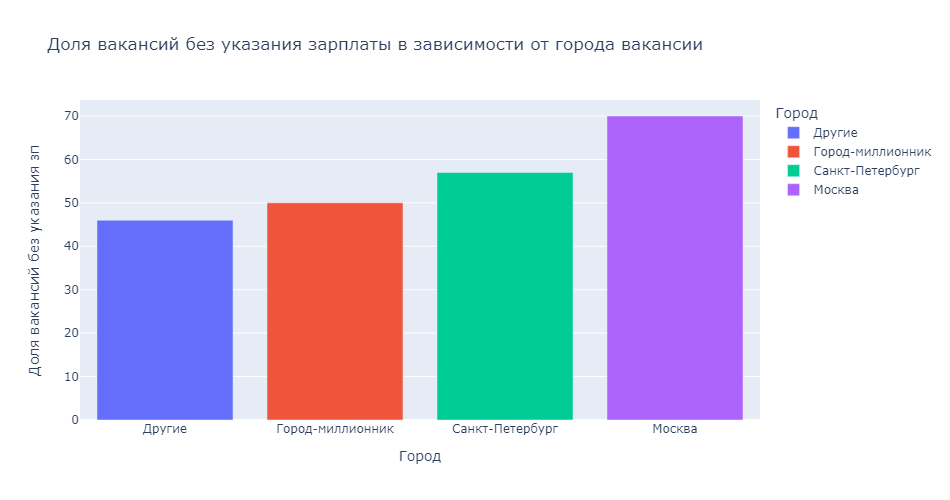

In [44]:
fig = px.bar(
    data_frame = salary_cities_df,
    x = "city_type",
    y = "vac_wo_salary_share",
    color = 'city_type',
    orientation = 'v',
    height = 500,
    width = 950,
    title = 'Доля вакансий без указания зарплаты в зависимости от города вакансии'
)
fig.update_layout(
    xaxis_title_text = 'Город',
    yaxis_title_text = 'Доля вакансий без указания зп',
    legend = dict(title = "Город")
)
fig.show("png")
fig.write_html("plotly/no_salary_city.html")

На графике видна явная закономерность: чем крупнее город, тем менее охотно работодатели указывают зарплаты для своих вакансий.

Это может быть связано с тем, что в крупных городах больше вакансий с высокой зарплатой и в областях, в которых зарплату обычно не указывают (например, руководящие должности), однако данное предположение требует дополнительной проверки

In [45]:
query = f'''
/* Т.к. в Postgres нет функции pivot, преобразуем результат подзапроса T0
   к формату сводной таблицы через CASE. Для этого создадим столбцы, каждый из которых
   соответствует одному из значений поля schedule. В строках этих новых столбцов
   будет сумма по полю с зарплатой" */
SELECT schedule,
  SUM(
  CASE experience
    WHEN 'Нет опыта'
    THEN vac_wo_salary_share
    ELSE 0
  END) AS "Нет опыта",
  SUM(
  CASE experience
    WHEN 'От 1 года до 3 лет'
    THEN vac_wo_salary_share
    ELSE 0
  END) AS "От 1 года до 3 лет",
  SUM(
  CASE experience
    WHEN 'От 3 до 6 лет'
    THEN vac_wo_salary_share
    ELSE 0
  END) AS "От 3 до 6 лет",
  SUM(
  CASE experience
    WHEN 'Более 6 лет'
    THEN vac_wo_salary_share
    ELSE 0
  END) AS "Более 6 лет"
FROM
  (SELECT experience,
    SCHEDULE,
    CAST(SUM(
    CASE
      WHEN COALESCE(salary_from, salary_to) IS NULL
      THEN 1
      ELSE 0
    END) AS FLOAT)*100/CAST(COUNT(DISTINCT vacancies.ID) AS FLOAT) AS vac_wo_salary_share
  FROM public.vacancies vacancies
  GROUP BY 1,
    2
  ) T0
GROUP BY 1
'''

salary_details_df = pd.read_sql_query(query, connection).set_index('schedule')

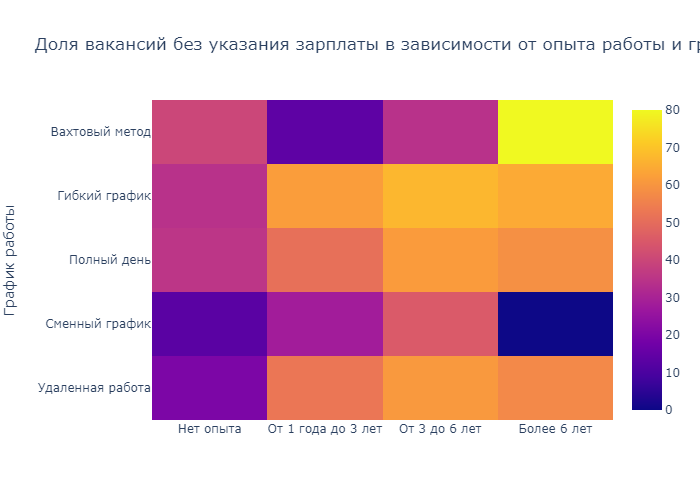

In [46]:
fig = px.imshow(salary_details_df,
                aspect = "auto",
                title = 'Доля вакансий без указания зарплаты в зависимости от опыта работы и графика')
fig.update_layout(
    yaxis_title_text = 'График работы',
    legend = dict(title = "Доля вакансий без указания зп")
)
fig.show("png")
fig.write_html("plotly/no_slary_exprnce_schedule.html")

Бóльшая часть вакансий без указания зарплаты предполагает наличие опыта (прослеживается четкая закономерность - чем бóльшим опытом должен обладать кандидат, тем менее вероятно, что будет указана зарплата). Это говорит в пользу предположения, что работодатели, кооторый ищут более опытных кандидатов (и, соответственно, на более высокооплачиваемую должность), предпочитают не раскрывать уровень зарплаты.<br>
Видна также зависимость от типа рабочего графика: наибольшее число вакансий с указанием зарплаты предполагают удаленную работу или сменный график. Данная закономерность требует дополнительного исследования

In [47]:
query = f'''
SELECT
  CASE
    WHEN operating_areas_cnt<=3
    THEN CAST(operating_areas_cnt AS TEXT)
    ELSE '>3'
  END AS operating_areas_cnt,
  ind_cnt,
  COUNT(DISTINCT id) AS emp_cnt
FROM
  (SELECT employers.id,
    COUNT(DISTINCT vacancies.area_id)   AS operating_areas_cnt,
    COUNT(DISTINCT emp_ind.industry_id) AS ind_cnt
  FROM public.employers employers
  LEFT JOIN public.vacancies vacancies
  ON vacancies.employer_id = employers.id
  LEFT JOIN public.employers_industries emp_ind
  ON employers.id = emp_ind.employer_id
  GROUP BY employers.id
  ) T0
GROUP BY 1, 2
ORDER BY 2'''

emp_details_df = pd.read_sql_query(query, connection)

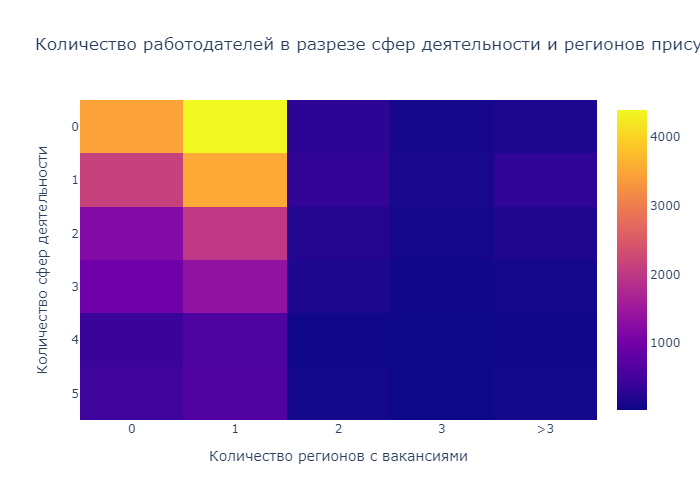

In [48]:
df4 = emp_details_df.pivot_table(
    values = 'emp_cnt',
    index = 'ind_cnt',
    columns = 'operating_areas_cnt',
    fill_value = 0,
    aggfunc = 'sum'
)
fig = px.imshow(df4, aspect = "auto", \
title = 'Количество работодателей в разрезе сфер деятельности и регионов присутствия')
fig.update_layout(
    xaxis_title_text = 'Количество регионов с вакансиями',
    yaxis_title_text = 'Количество сфер деятельности'
)
fig.show("png")
fig.write_html("plotly/employers_ind_reg.html")

Как видно на тепловой карте, часть работодателей не разместила ни одной вакансии. Среди работодателей с вакансиями видна закономерность: по мере увеличения охвата регионального пристутствия уменьшается число работодателей.

Аналогичная ситуация имеет место при анализе числа работодателей с точки зрения сфер деятельности: у части сфера деятельности не указана, а среди остальных у большинства указана 1 сфера, и по мере увеличения числа сфер деятельности уменьшается число работодателей.

Таким образом, большинство компаний представлено в 1 регионе и сфокусировано на одной отрасли. Чем шире география и отраслевая диверсификация, тем меньше количество работодателей.

***

*Часть работодателей в настоящий момент не предлагает вакансий. У существенного количества не указана сфера деятельности или зарплата в описании вакансии (чаще всего такие вакансии представлены в крупных городах). Среди тех, у кого указана сфера деятельности и имеются вакансии, большинство компаний ведет деятельность в одном регионе и в одной отрасли.*

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [49]:
query = f'''SELECT COUNT(*) AS cnt
            FROM public.vacancies
            WHERE LOWER(name) LIKE ('%%data%%')
            OR LOWER(name) LIKE ('%%данн%%')
         '''

df = pd.read_sql_query(query, connection)

In [50]:
# результат запроса
print('Кол-во вакансий, имеющих отношение к данным:', df['cnt'][0])

Кол-во вакансий, имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [51]:
# текст запроса
query = f'''SELECT COUNT(*) AS cnt
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%%data scientist%%'
              OR LOWER(name) LIKE '%%data science%%'
              OR LOWER(name) LIKE '%%исследователь данных%%'
              OR name LIKE '%%ML%%'
              OR LOWER(name) LIKE '%%machine learning%%'
              OR LOWER(name) LIKE '%%машинн%%обучен%%')
              AND NOT(LOWER(name) LIKE '%%html%%')
              AND (LOWER(name) LIKE '%%junior%%'
              OR experience = 'Нет опыта'
              OR employment = 'Стажировка')
         '''

df = pd.read_sql_query(query, connection)

In [52]:
# результат запроса
print('Кол-во вакансий для начинающих дата-сайентистов:', df['cnt'][0])

Кол-во вакансий для начинающих дата-сайентистов: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [53]:
# текст запроса
query = f'''SELECT COUNT(*) AS cnt
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%%data scientist%%'
              OR LOWER(name) LIKE '%%data science%%'
              OR LOWER(name) LIKE '%%исследователь данных%%'
              OR name LIKE '%%ML%%'
              OR LOWER(name) LIKE '%%machine learning%%'
              OR LOWER(name) LIKE '%%машинн%%обучен%%')
              AND NOT(LOWER(name) LIKE '%%html%%')
              AND (LOWER(key_skills) LIKE '%%sql%%'
              OR LOWER(key_skills) LIKE '%%postgres%%')
         '''

df = pd.read_sql_query(query, connection)

In [54]:
# результат запроса
print('Кол-во вакансий для дата-сайентистов с SQL/Postgres:', df['cnt'][0])

Кол-во вакансий для дата-сайентистов с SQL/Postgres: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [55]:
# текст запроса
query = f'''SELECT COUNT(*) AS cnt
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%%data scientist%%'
              OR LOWER(name) LIKE '%%data science%%'
              OR LOWER(name) LIKE '%%исследователь данных%%'
              OR name LIKE '%%ML%%'
              OR LOWER(name) LIKE '%%machine learning%%'
              OR LOWER(name) LIKE '%%машинн%%обучен%%')
              AND NOT(LOWER(name) LIKE '%%html%%')
              AND (LOWER(key_skills) LIKE '%%python%%')
         '''

df = pd.read_sql_query(query, connection)

In [56]:
# результат запроса
print('Кол-во вакансий для дата-сайентистов с Python:', df['cnt'][0])

Кол-во вакансий для дата-сайентистов с Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [57]:
# текст запроса
query = f'''SELECT 
            ROUND(SUM(LENGTH(key_skills)-LENGTH(REPLACE(key_skills, CHR(9), ''))+1)::NUMERIC/COUNT(id), 2) 
              AS key_skills_per_vacancy
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%%data scientist%%'
              OR LOWER(name) LIKE '%%data science%%'
              OR LOWER(name) LIKE '%%исследователь данных%%'
              OR name LIKE '%%ML%%'
              OR LOWER(name) LIKE '%%machine learning%%'
              OR LOWER(name) LIKE '%%машинн%%обучен%%')
              AND NOT(LOWER(name) LIKE '%%html%%')
              AND key_skills IS NOT NULL
         '''

df = pd.read_sql_query(query, connection)

In [58]:
# результат запроса
print('Кол-во ключевых навыков на вакансию:', df['key_skills_per_vacancy'][0])

Кол-во ключевых навыков на вакансию: 6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [59]:
# текст запроса
query = f'''SELECT experience,
              ROUND(AVG(COALESCE(COALESCE((salary_from+salary_to)::NUMERIC/2, salary_from), salary_to)), 0)
                AS avg_salary
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%%data scientist%%'
            OR LOWER(name) LIKE '%%data science%%'
            OR LOWER(name) LIKE '%%исследователь данных%%'
            OR name LIKE '%%ML%%'
            OR LOWER(name) LIKE '%%machine learning%%'
            OR LOWER(name) LIKE '%%машинн%%обучен%%')
            AND NOT(LOWER(name) LIKE '%%html%%')
            AND NOT(COALESCE(salary_from, salary_to) IS NULL)
            GROUP BY 1
         '''

df = pd.read_sql_query(query, connection)

In [60]:
# результат запроса
df

,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

*Число вакансий для дата-сайентистов относительно невелико среди общего числа вакансий. Тем не менее, предлагаемые зарплаты выше, особенно это заметно для кандидатов с опытом от 3 лет.*

*Среди требований обычно присутствует несколько навыков одновременно, при этом, знание Python примерно в 1,5 раза более востребовано, чем знание SQL или Postgres*

# Общий вывод по проекту

*Анализ базы данных с вакансиями показывает, что как работодатели, так и их вакансии имеют широкий охват по регионам присутствия и сферам деятельности. Тем не менее, прослеживается закономерность, связанная с концентрацией вакансий в крупных городах, в них же выше предлагаемые зарплаты (при этом необходимо учитывать, что примерно у половины вакансий зарплата не указана).*

*У части работодателей вакансии представлены в нескольких регионах, однако, большинство фокусируется на одном регионе и на одной отрасли.*

*Число вакансий, связанных с Data Science, относительно невелико, менее 10%, однако в данной сфере предлагаются более высокие зарплаты.*

In [61]:
connection.close()
engine.dispose()